# Credicxo Assignment

In [1]:
# Importing required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading data in pandas Dataframe
musk = pd.read_csv('musk.csv')

In [3]:
musk.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
musk['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [5]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [6]:
musk.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


## Missing Value Treatment

In [7]:
(musk.isnull().sum()).sum()

0

### No missing value found

## Outier Treatment

In [8]:
musk.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

C:\Users\mohsinu\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


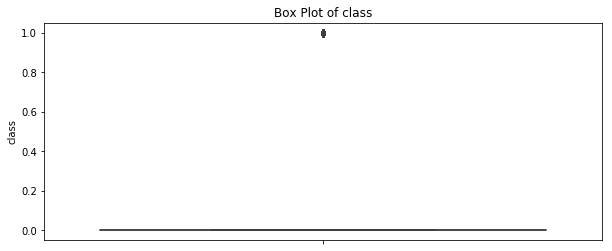

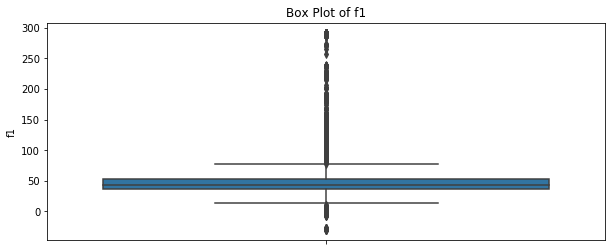

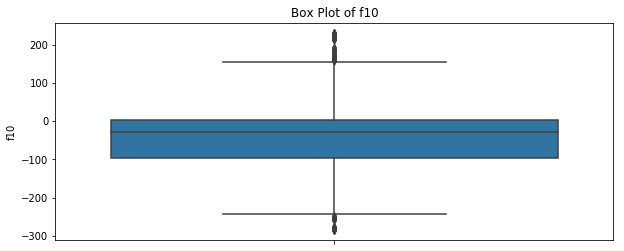

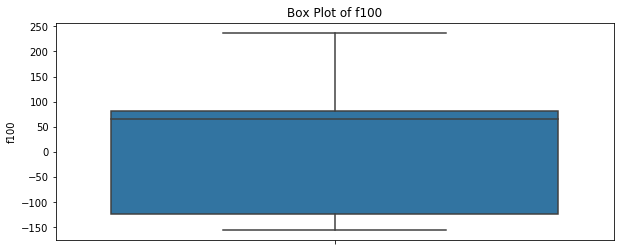

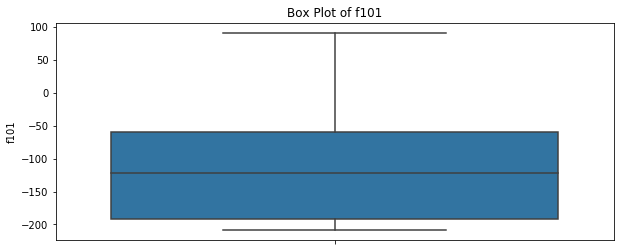

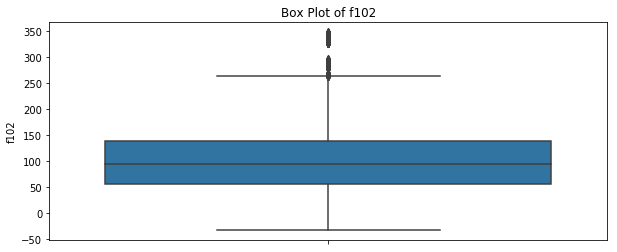

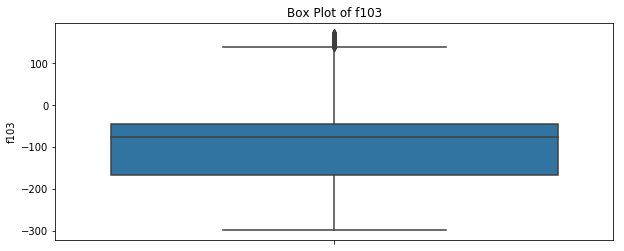

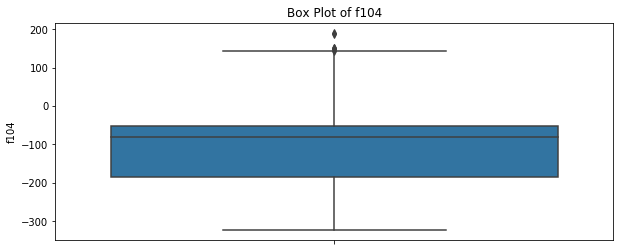

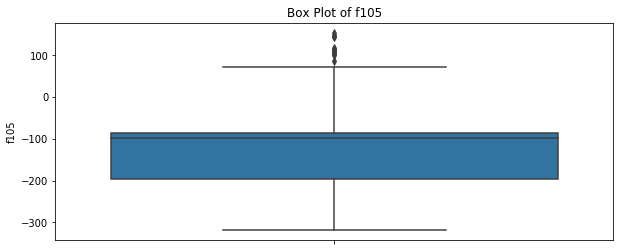

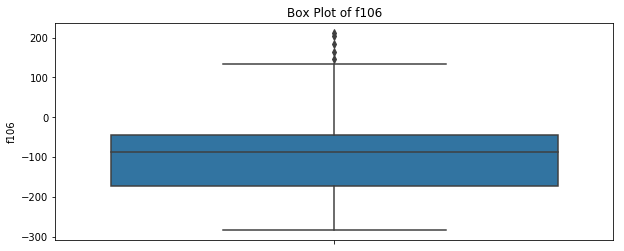

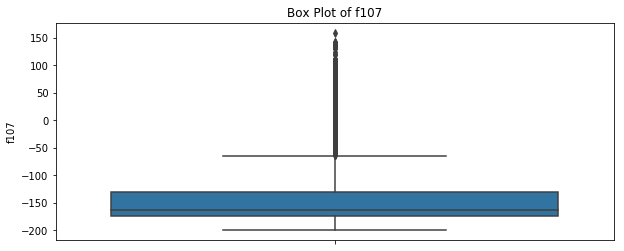

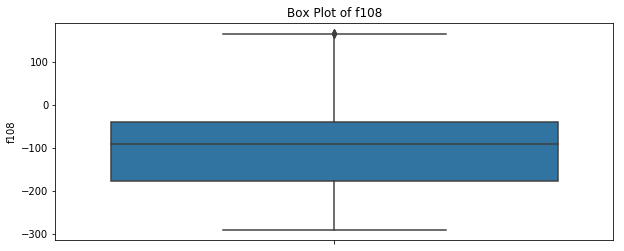

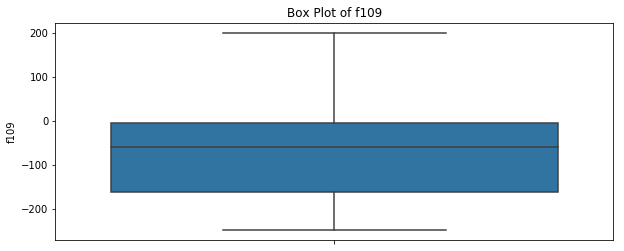

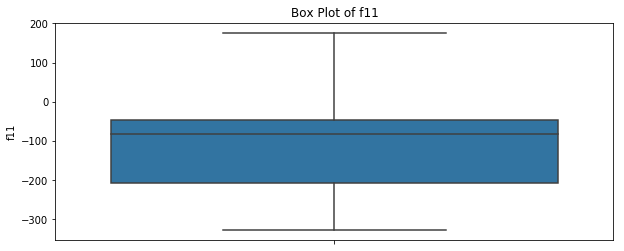

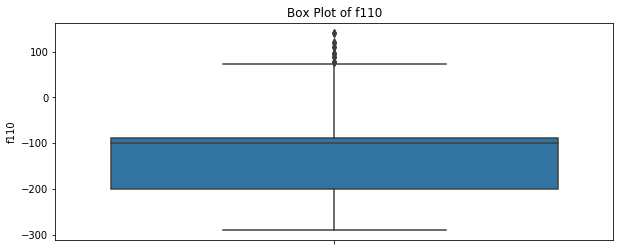

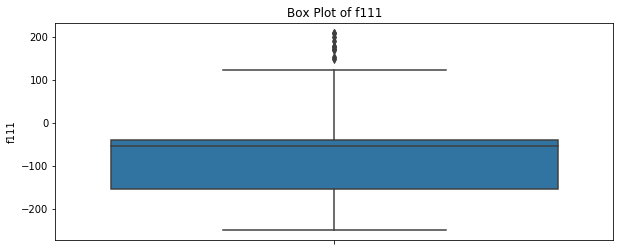

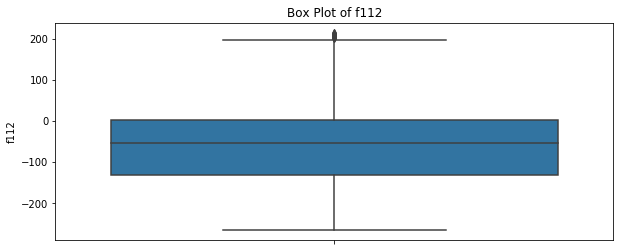

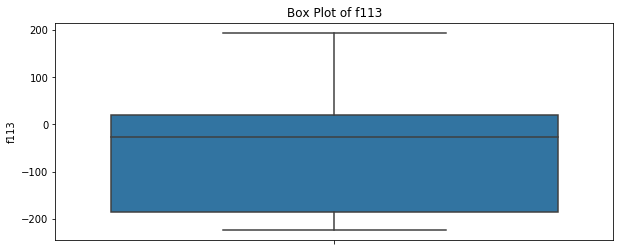

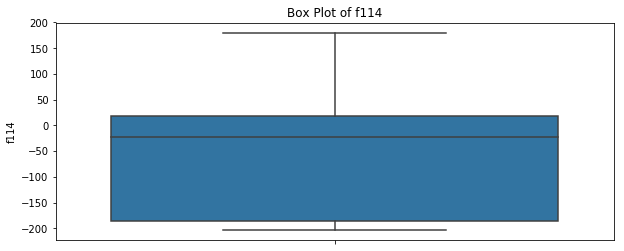

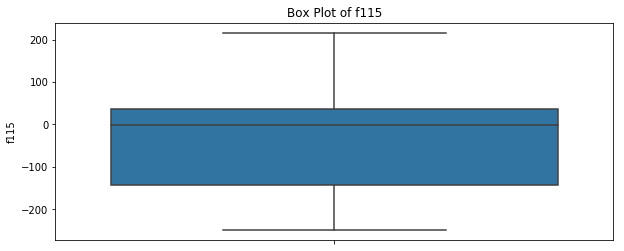

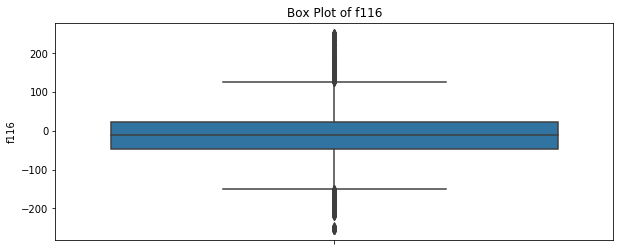

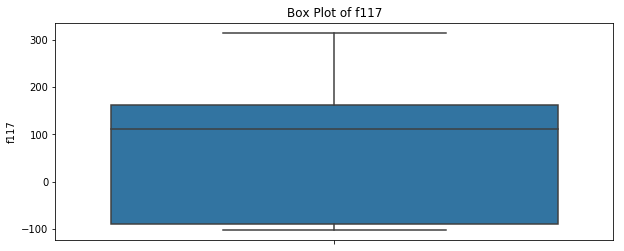

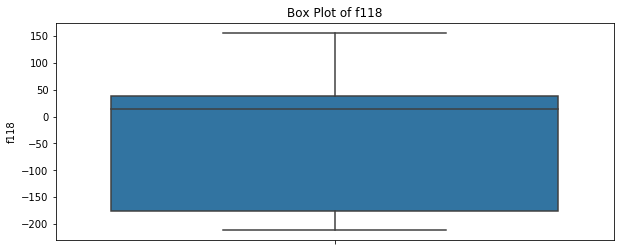

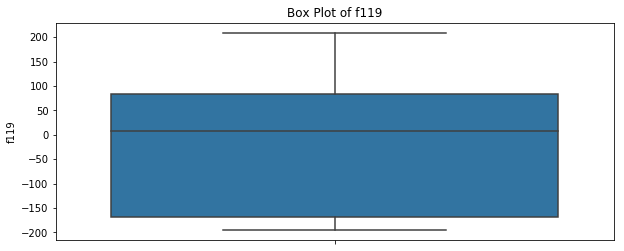

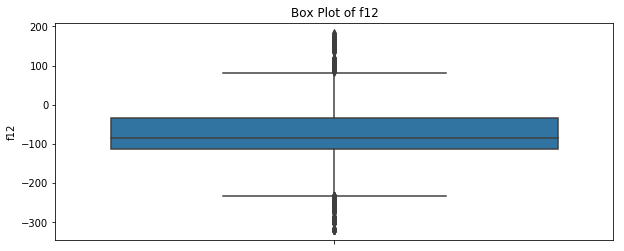

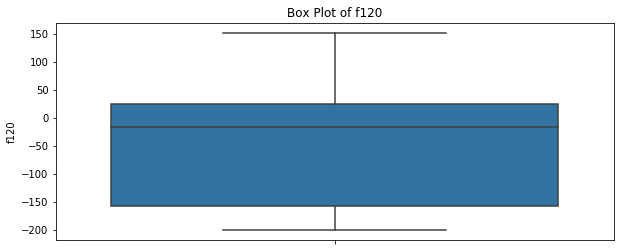

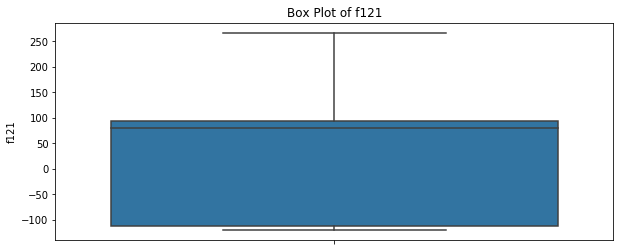

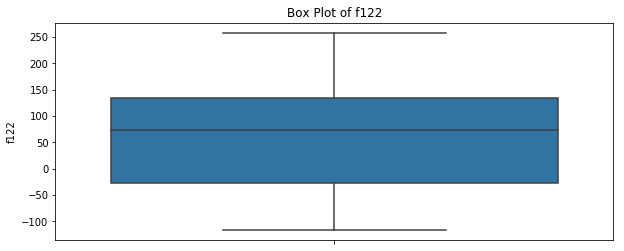

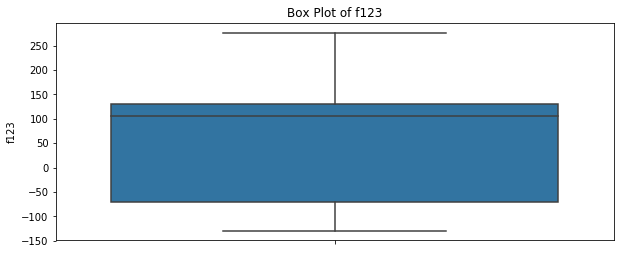

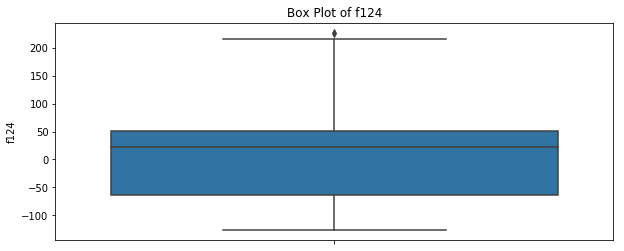

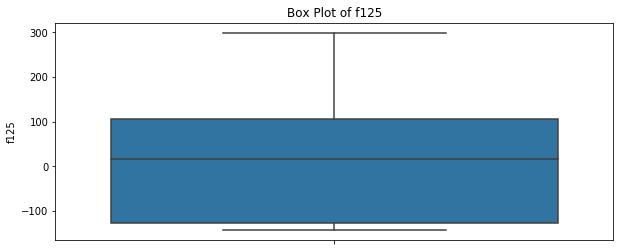

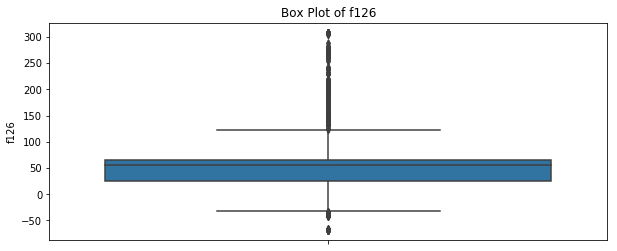

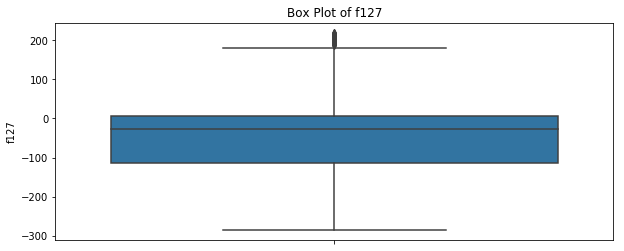

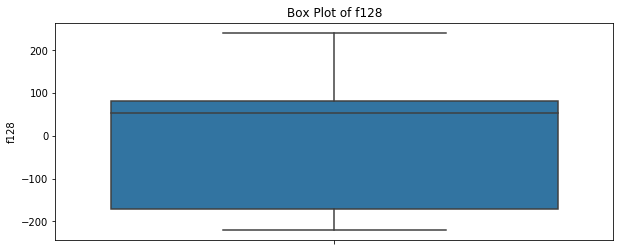

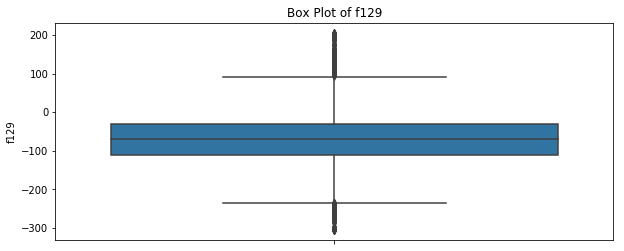

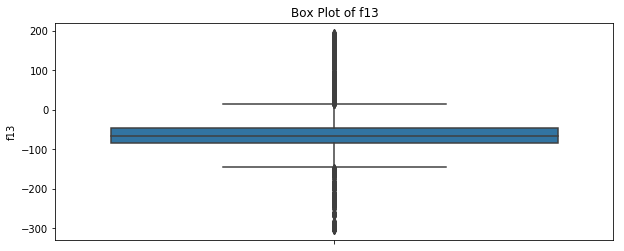

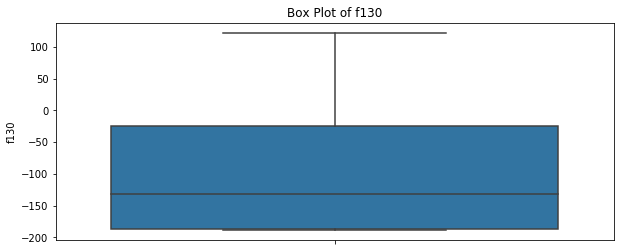

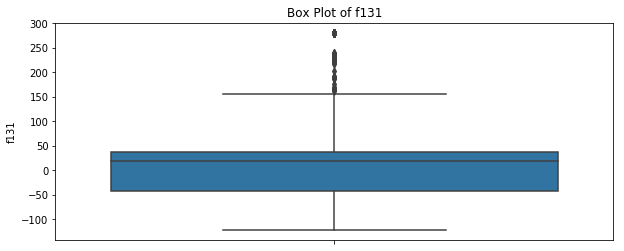

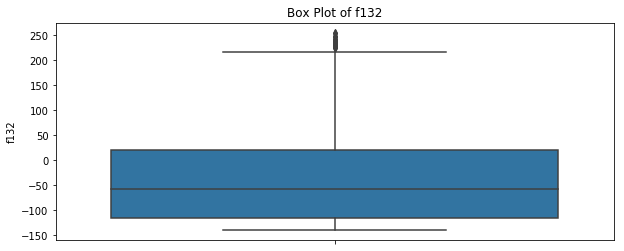

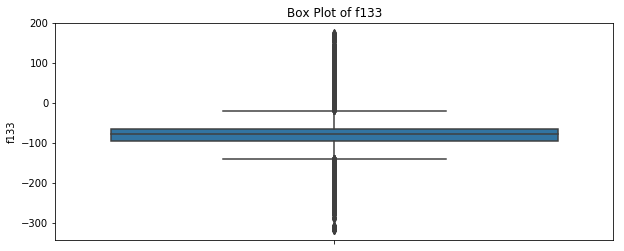

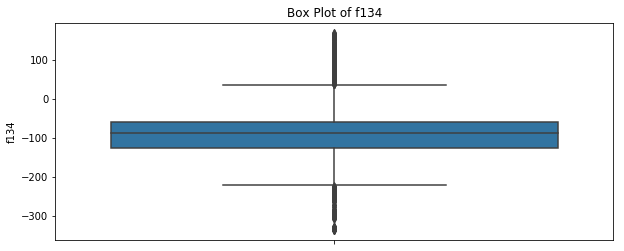

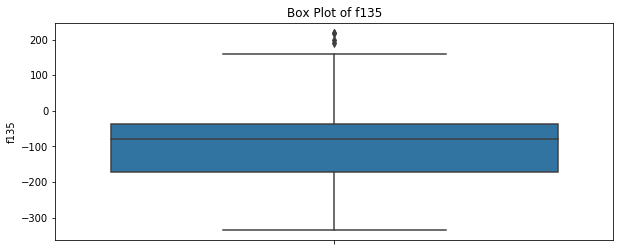

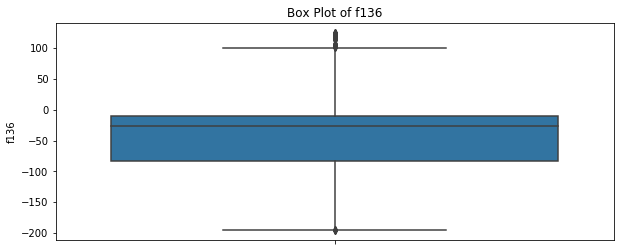

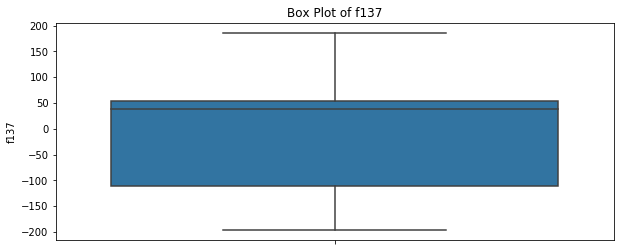

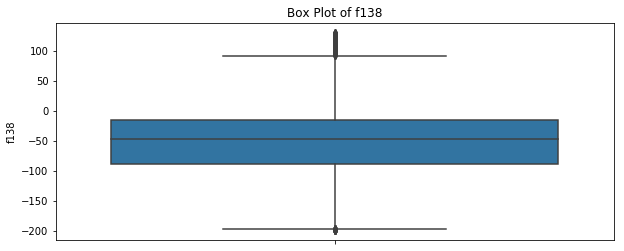

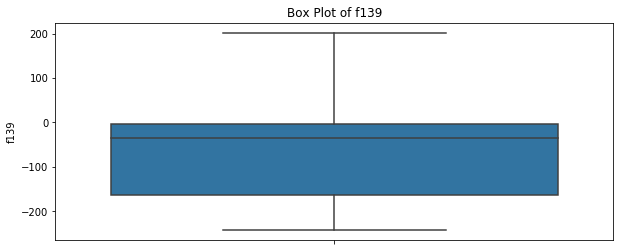

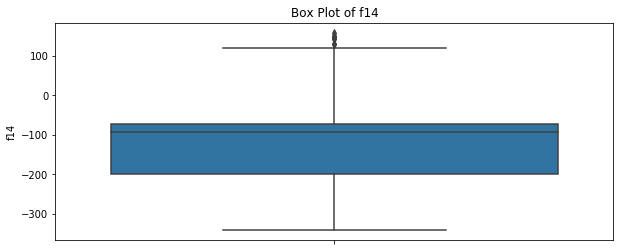

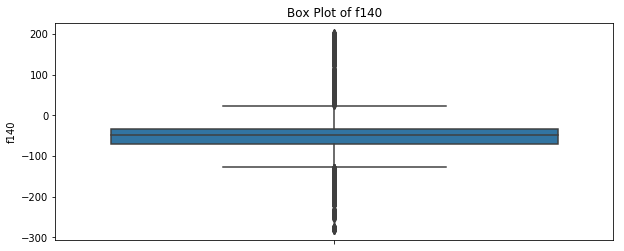

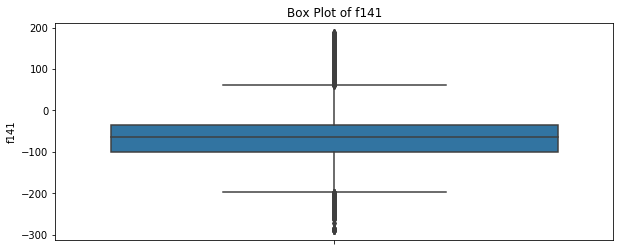

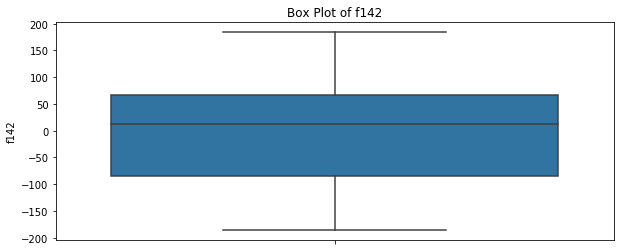

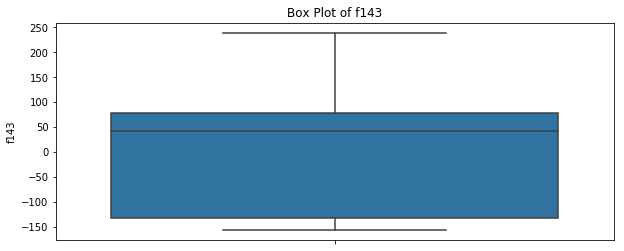

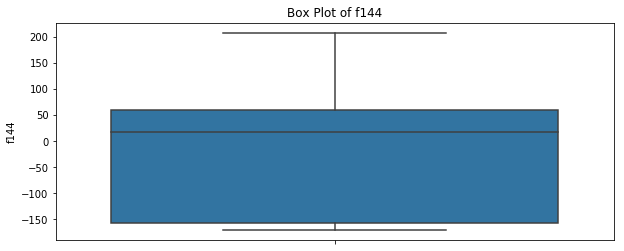

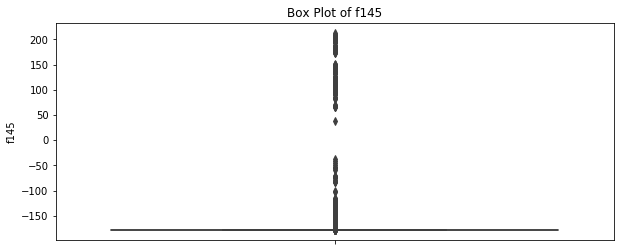

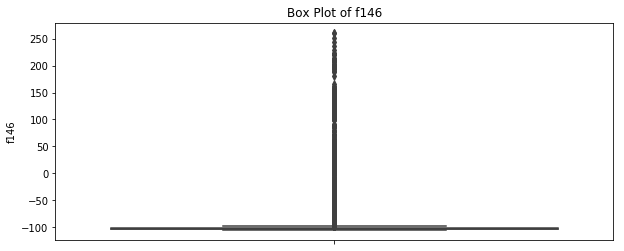

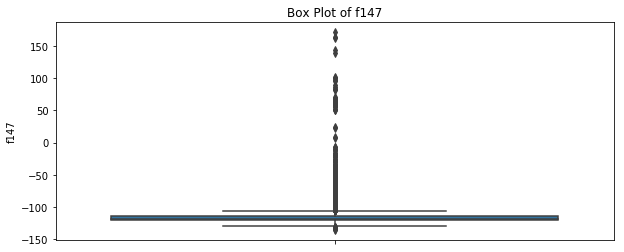

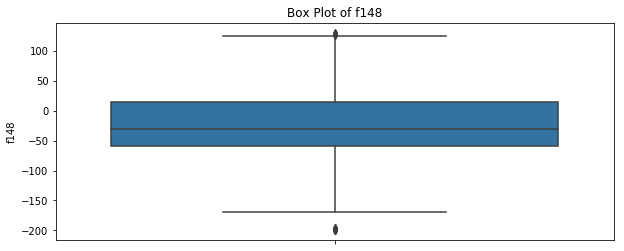

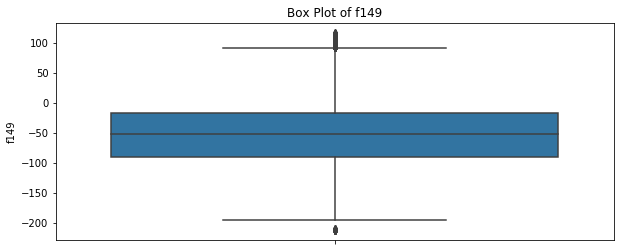

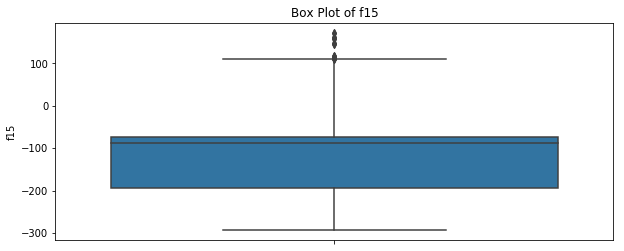

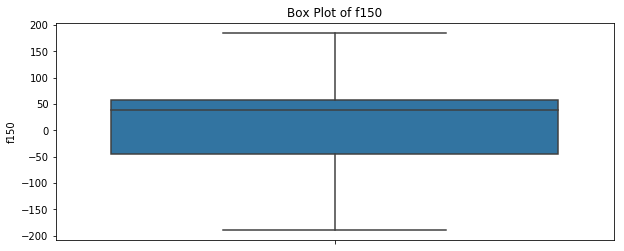

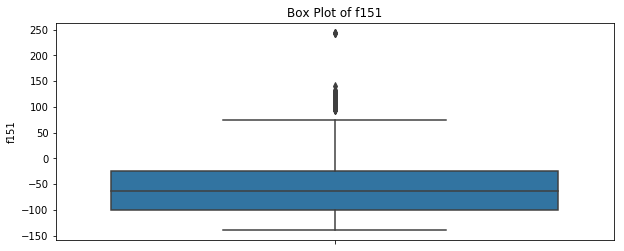

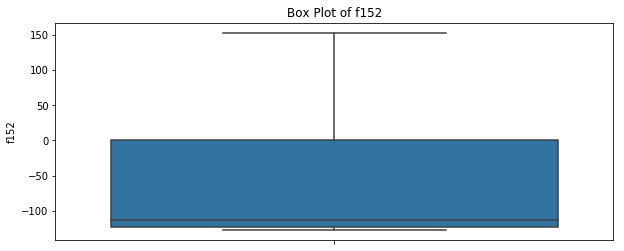

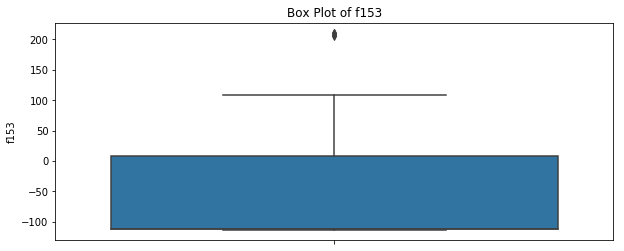

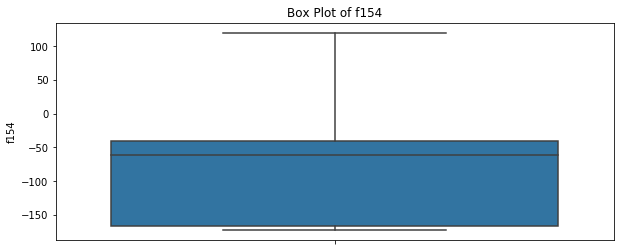

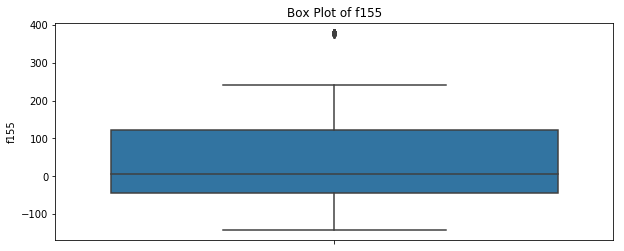

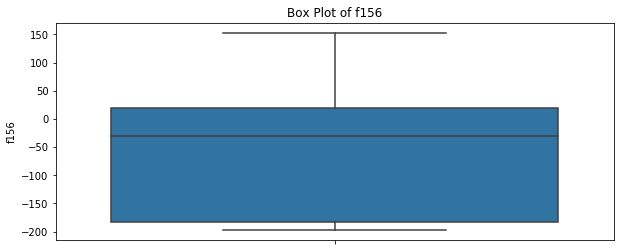

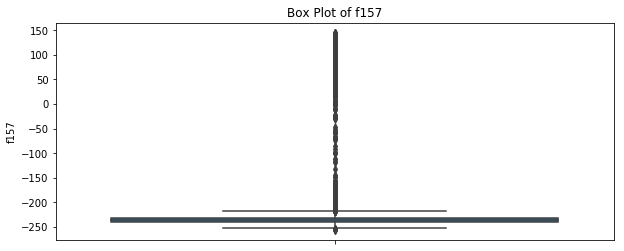

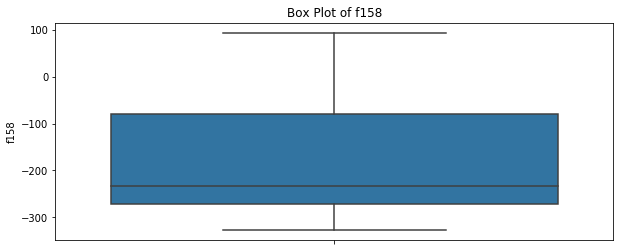

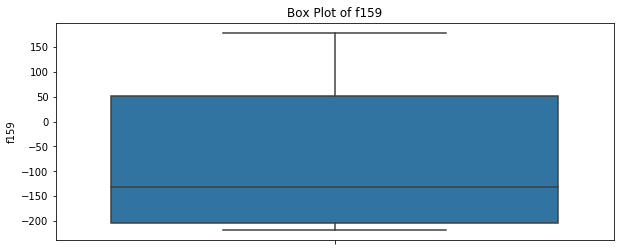

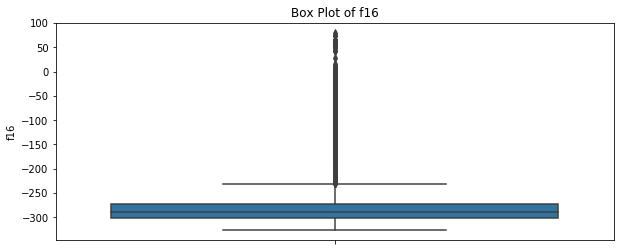

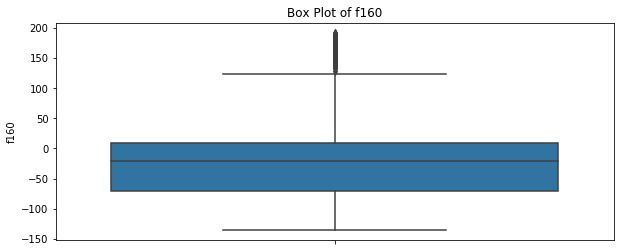

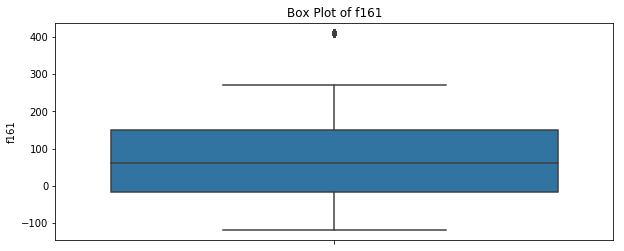

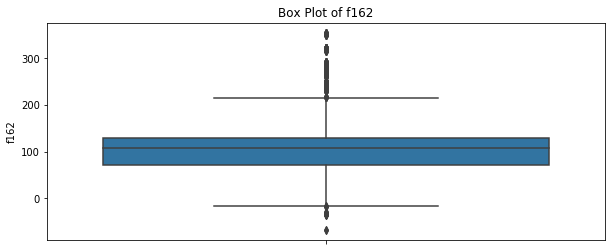

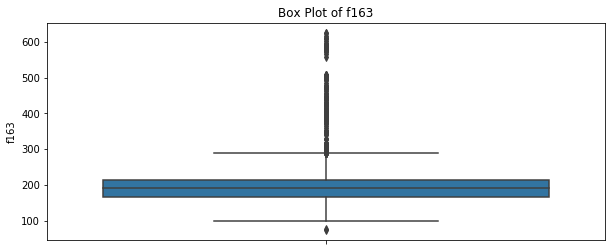

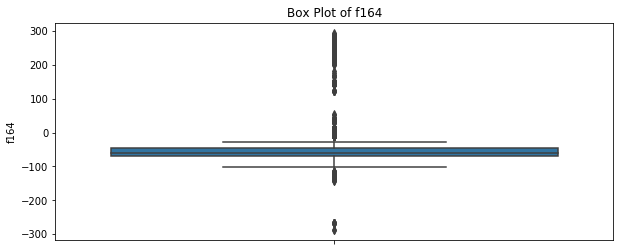

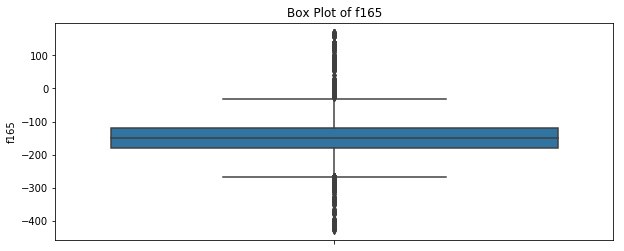

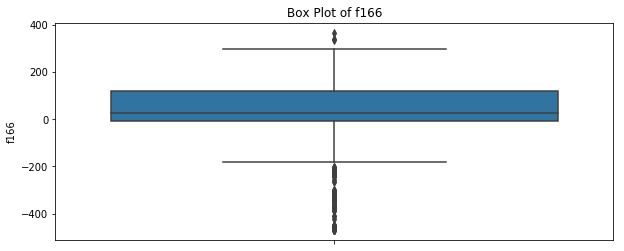

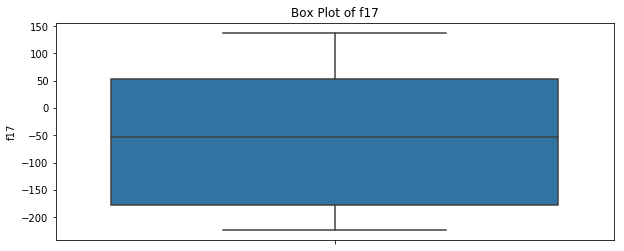

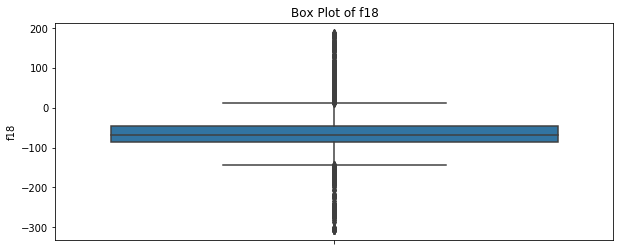

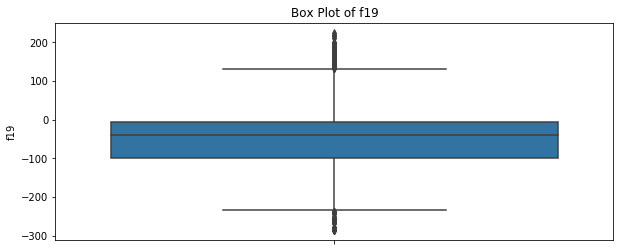

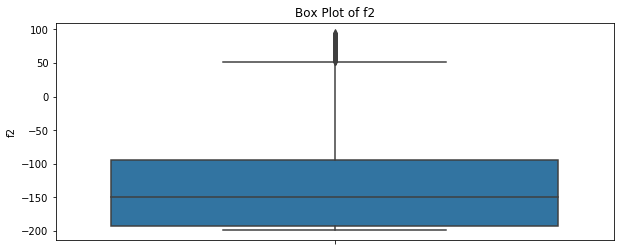

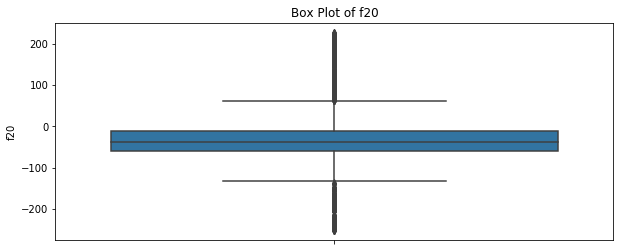

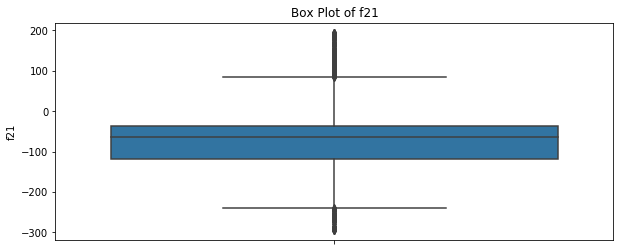

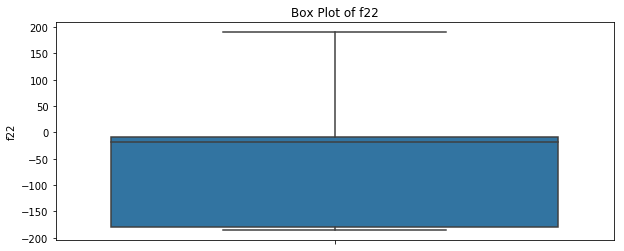

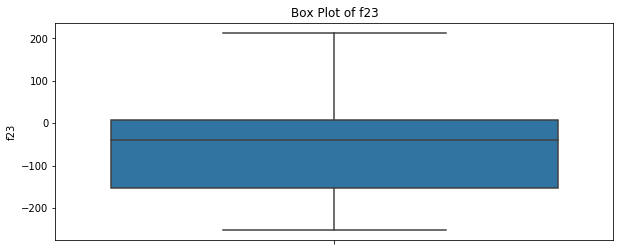

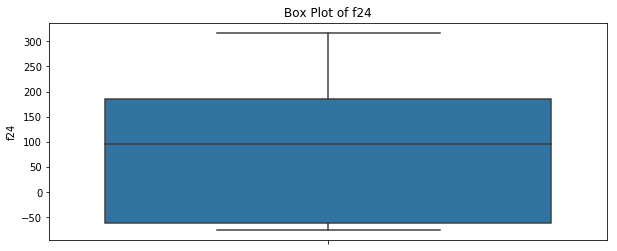

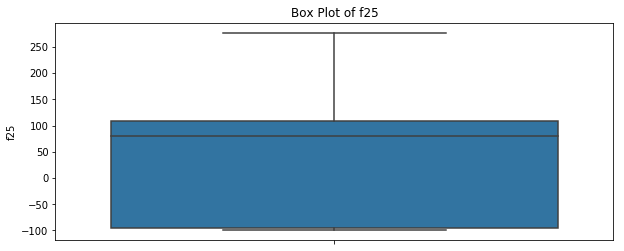

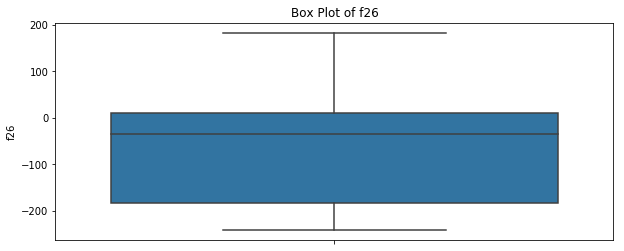

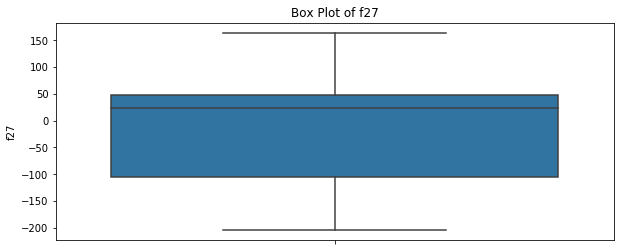

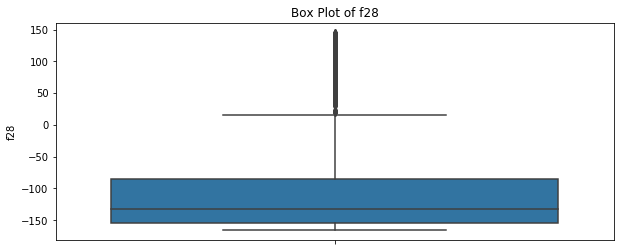

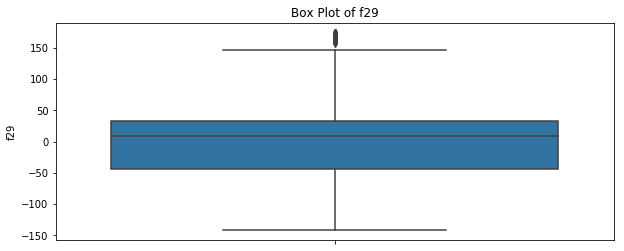

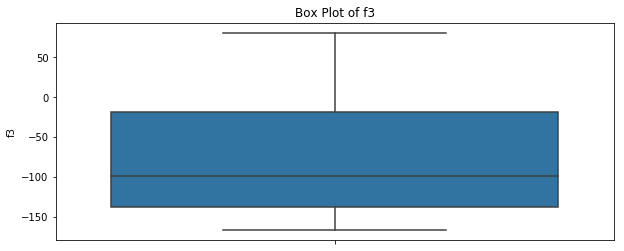

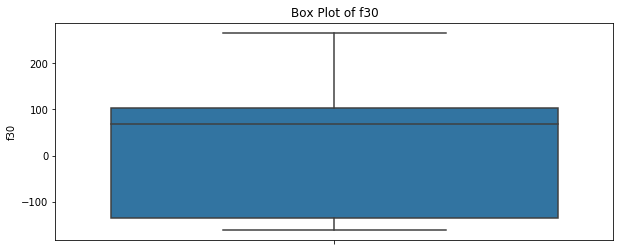

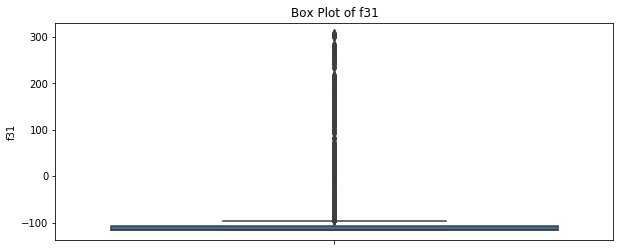

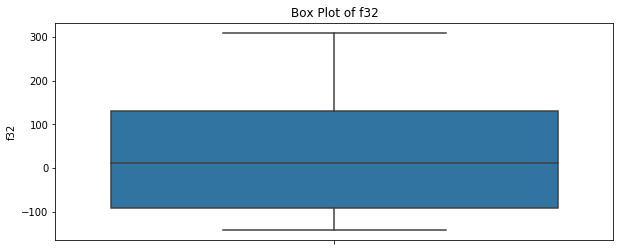

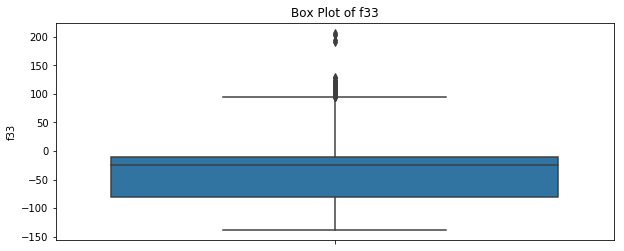

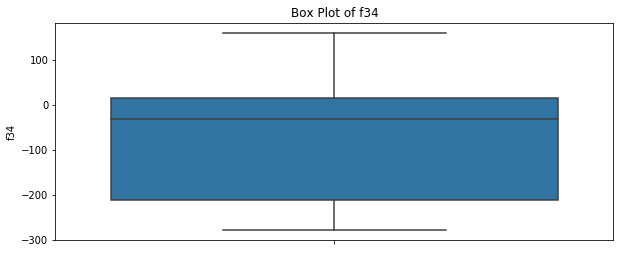

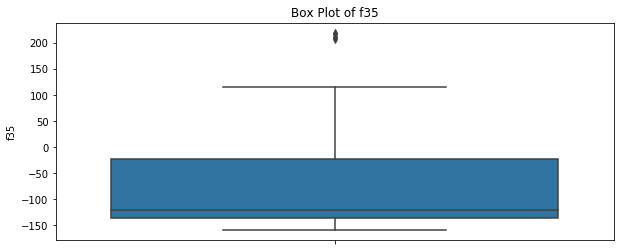

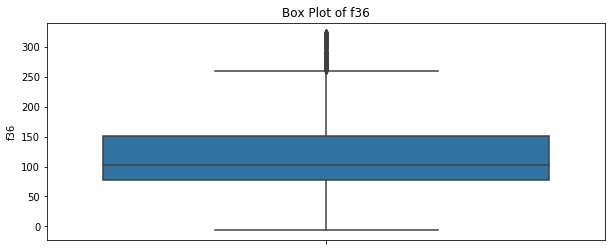

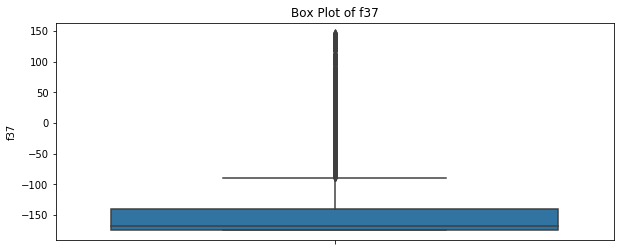

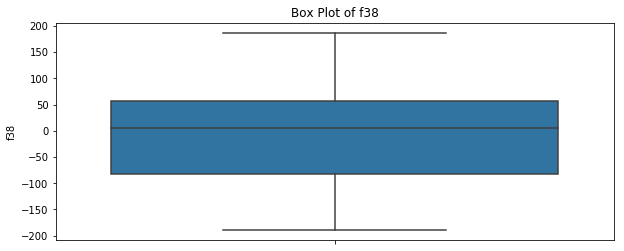

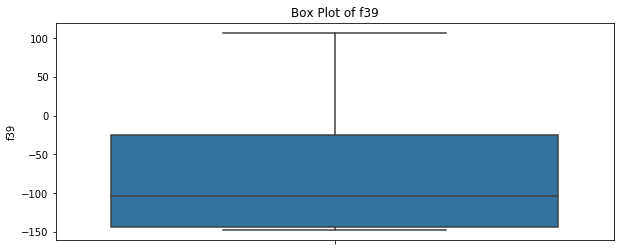

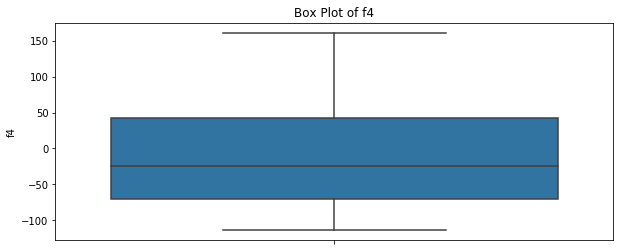

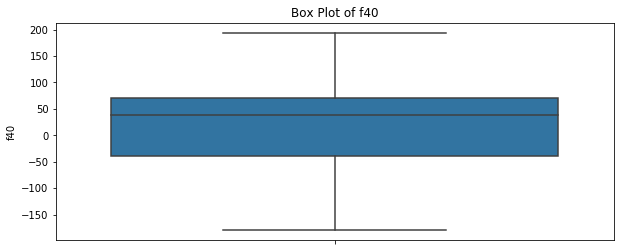

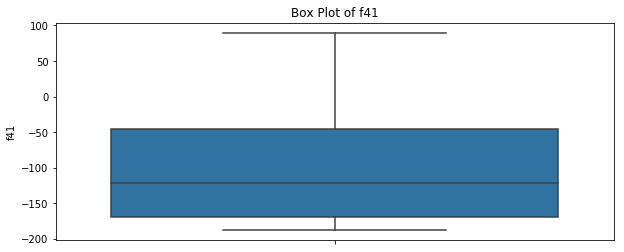

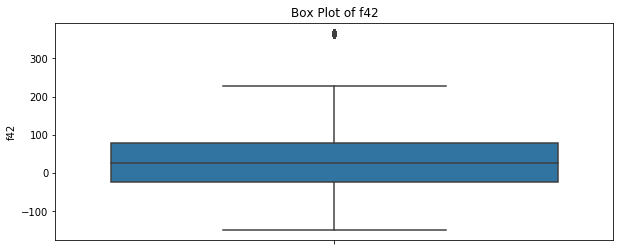

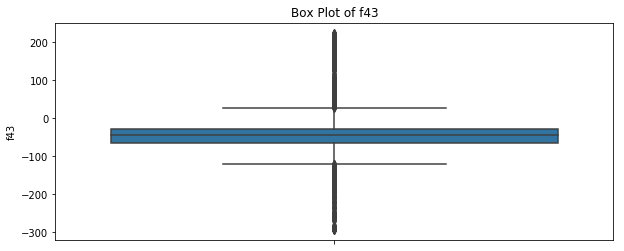

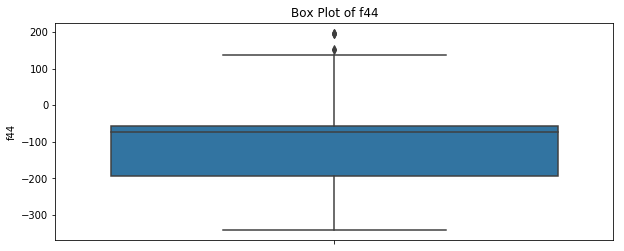

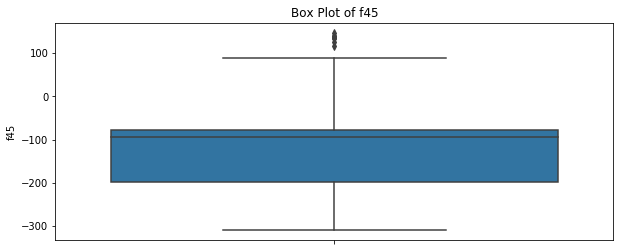

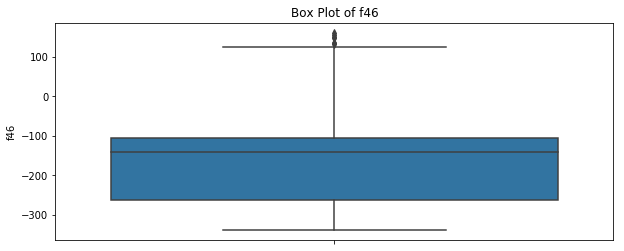

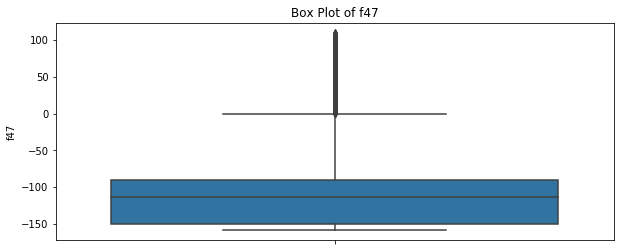

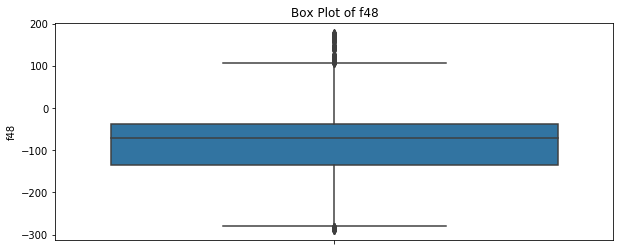

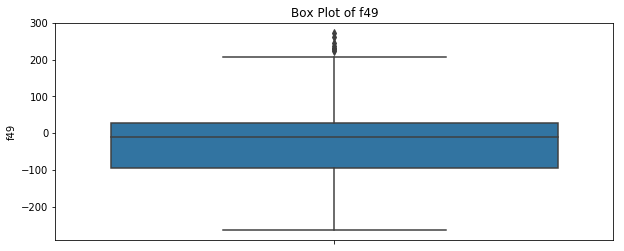

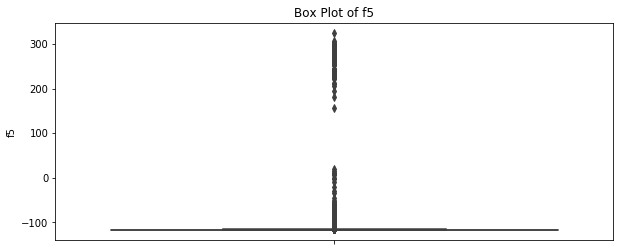

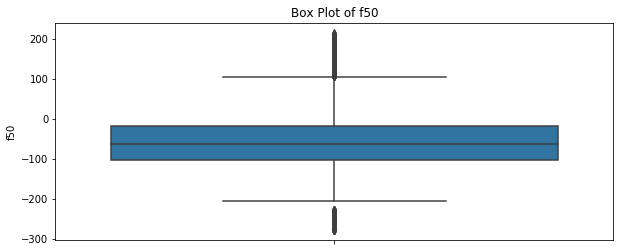

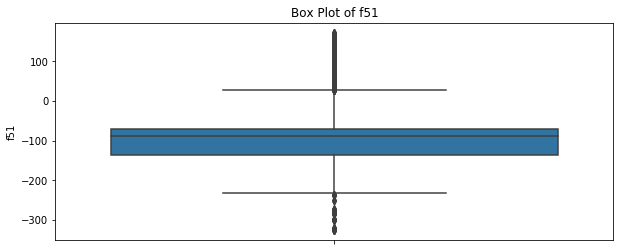

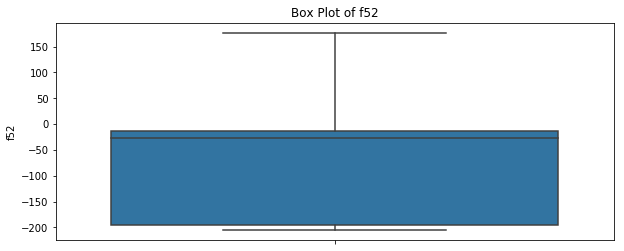

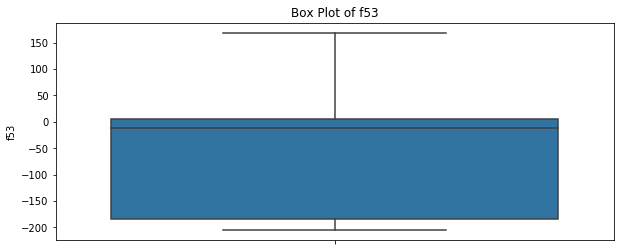

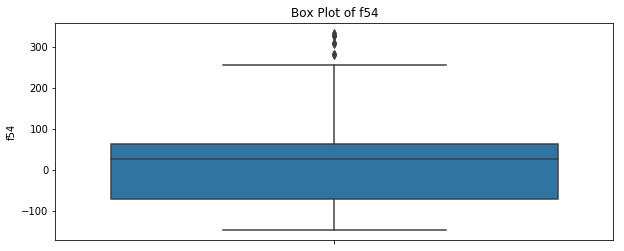

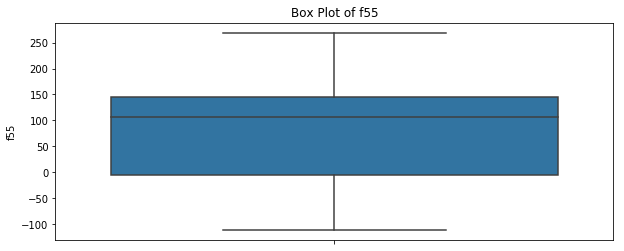

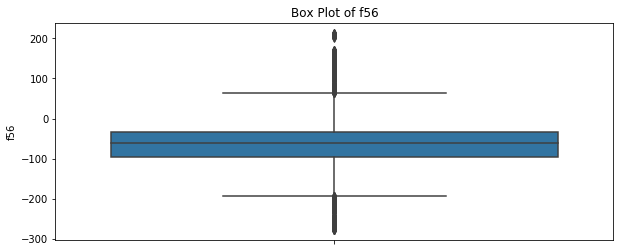

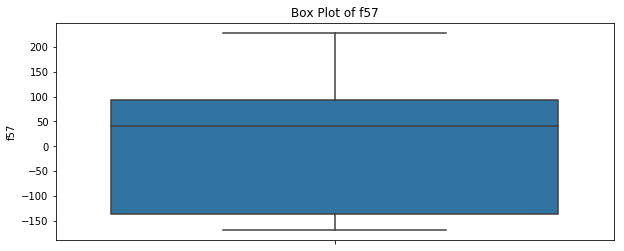

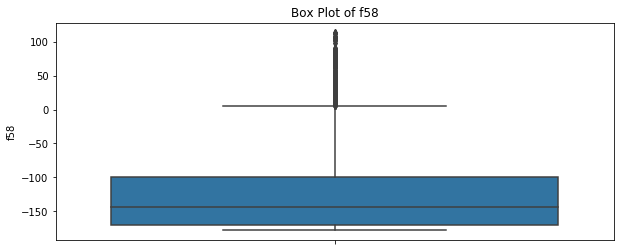

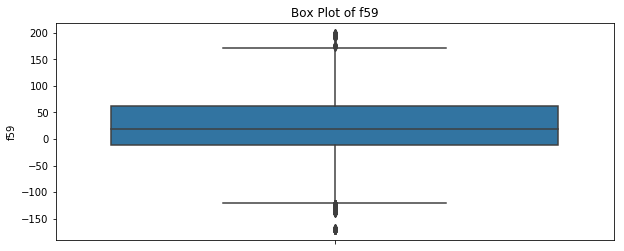

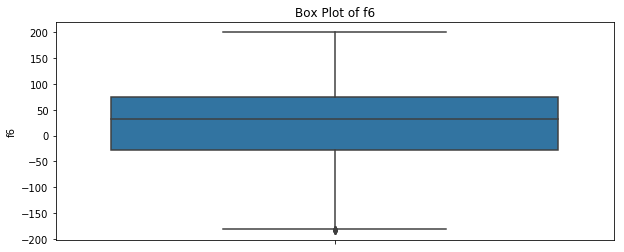

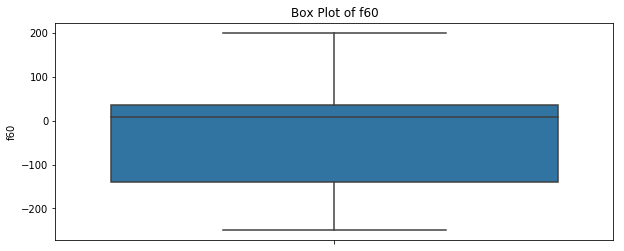

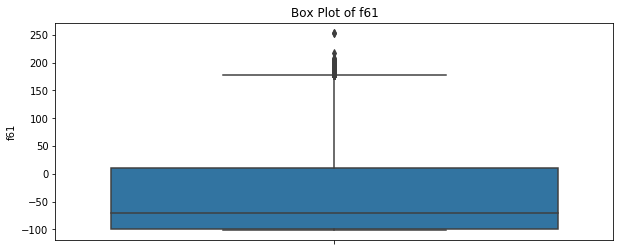

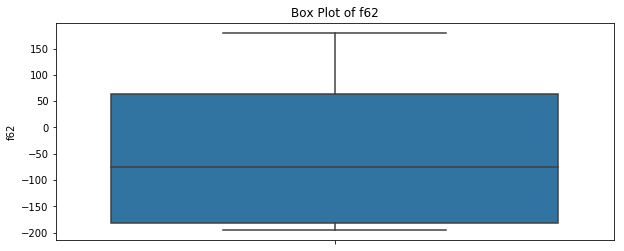

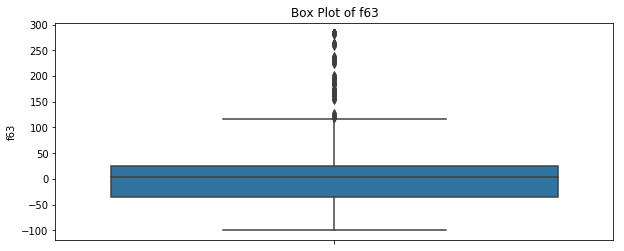

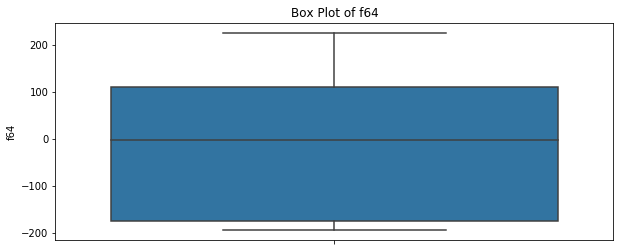

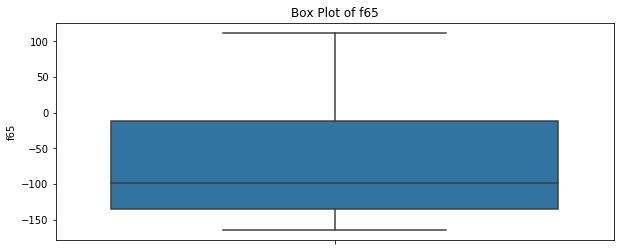

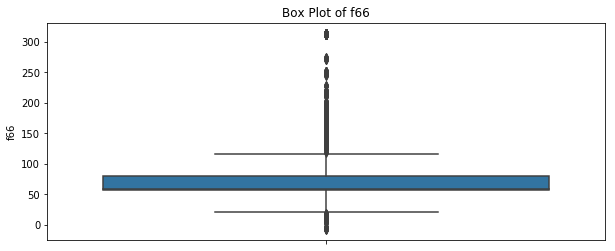

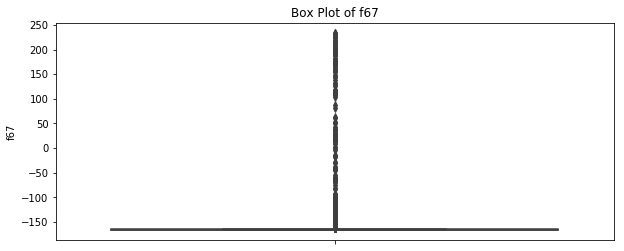

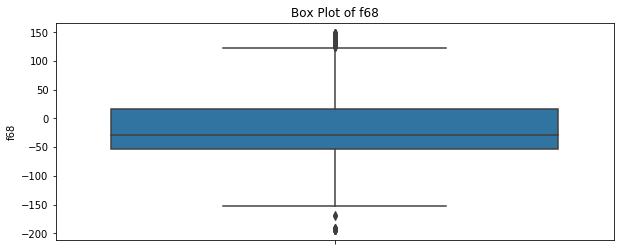

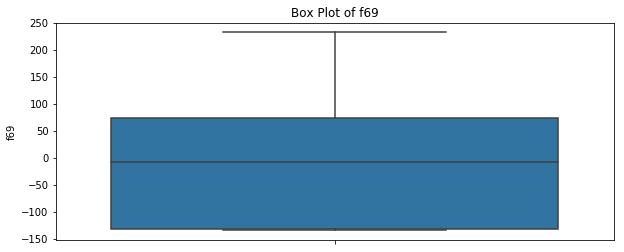

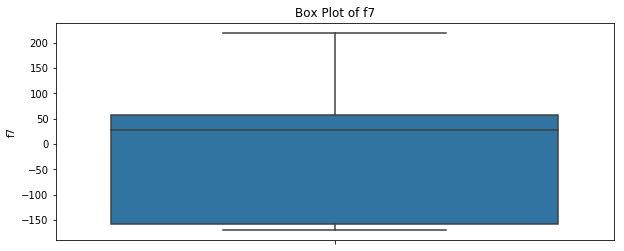

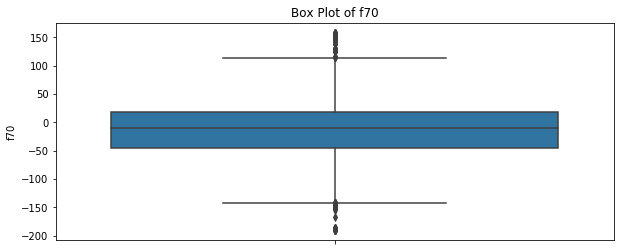

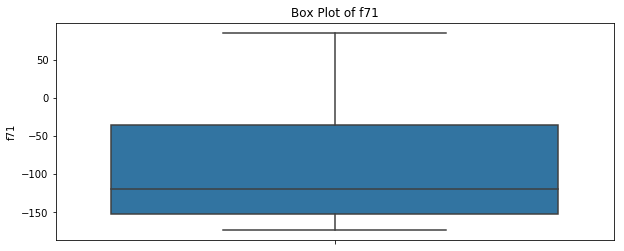

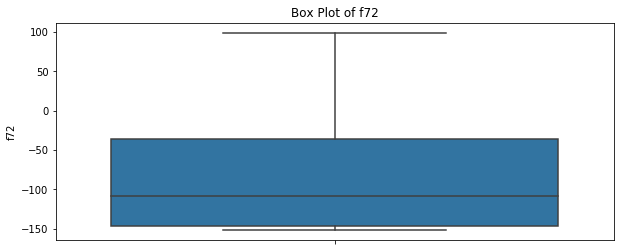

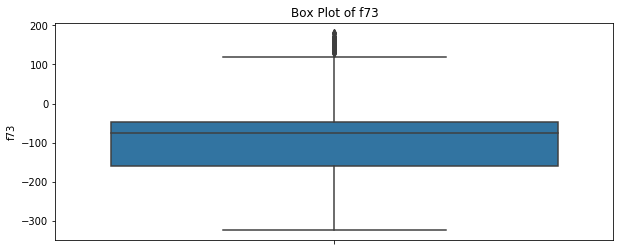

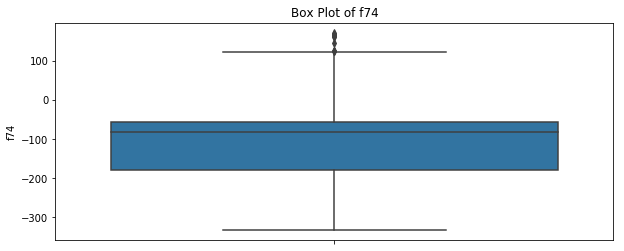

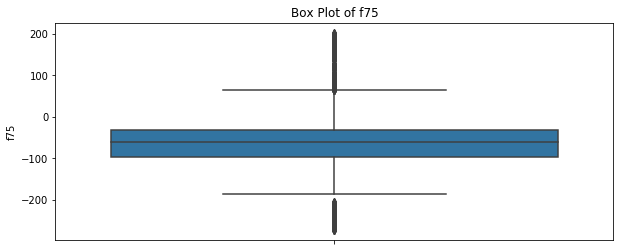

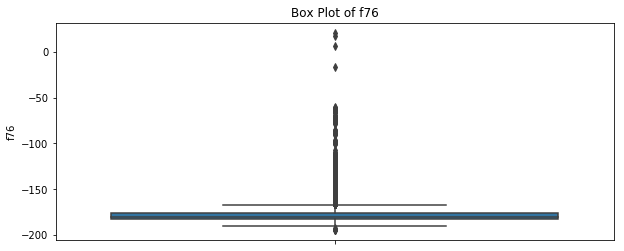

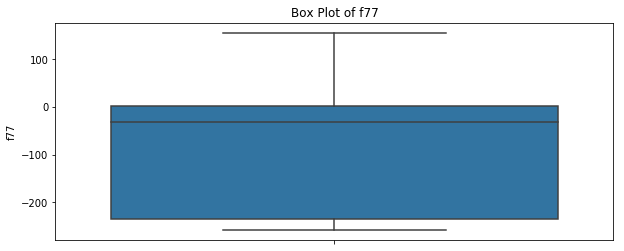

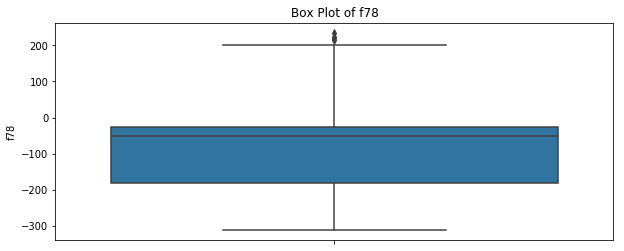

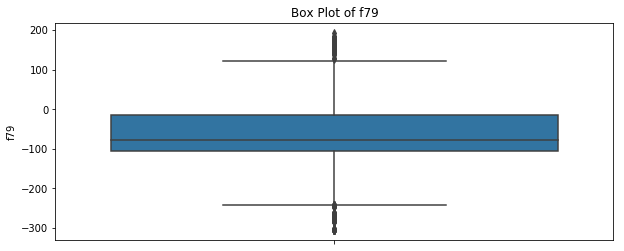

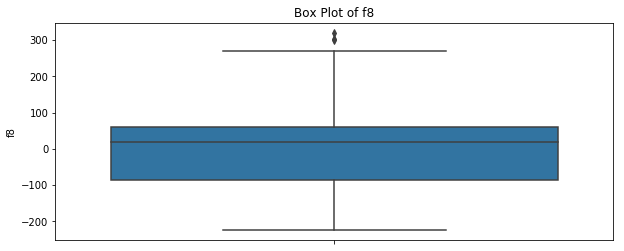

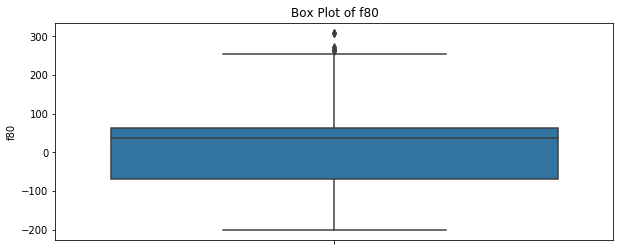

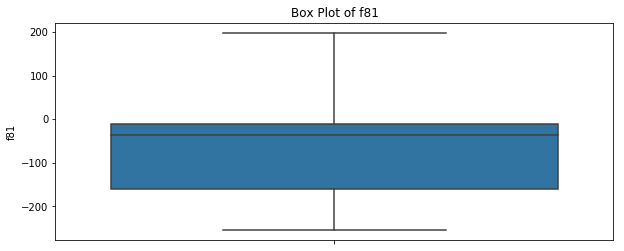

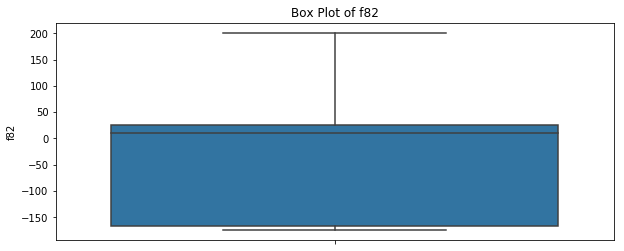

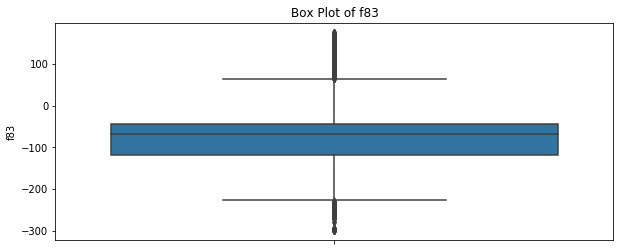

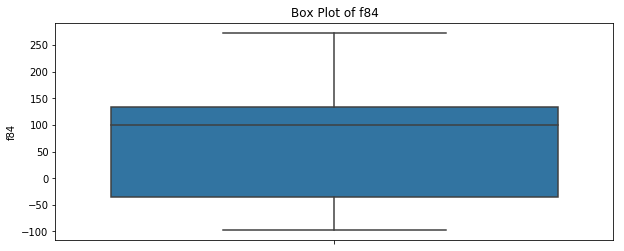

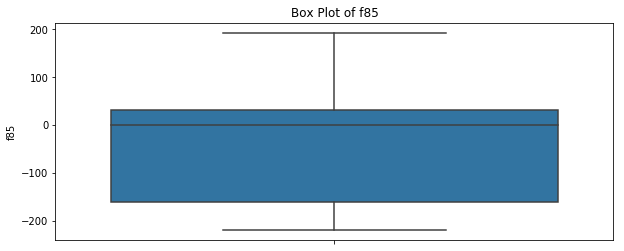

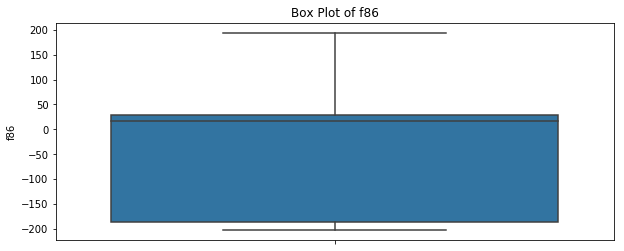

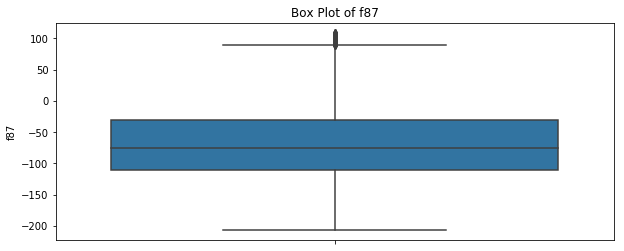

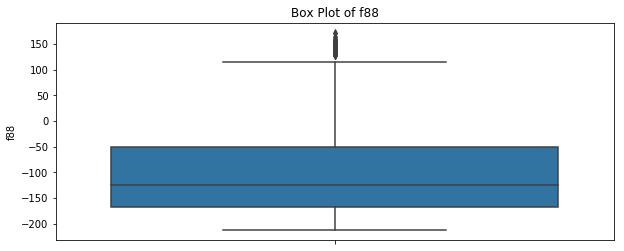

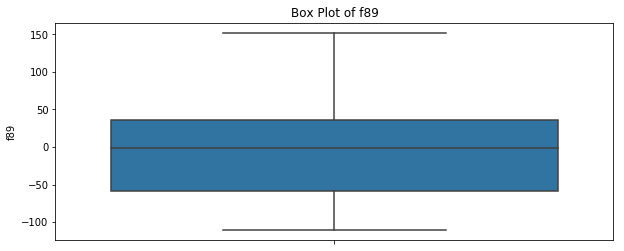

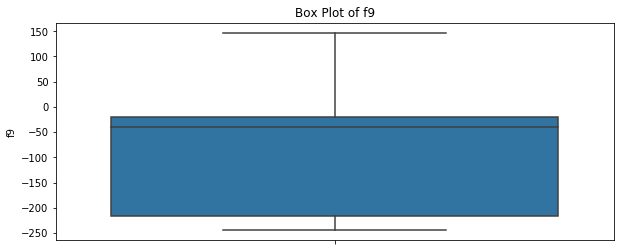

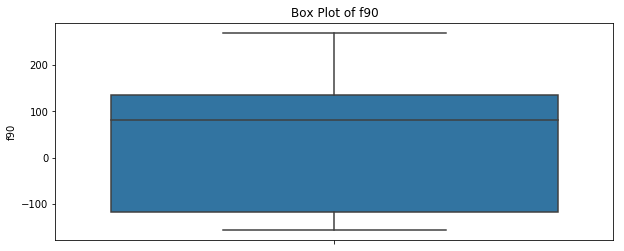

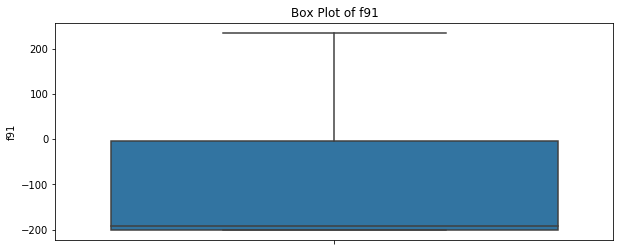

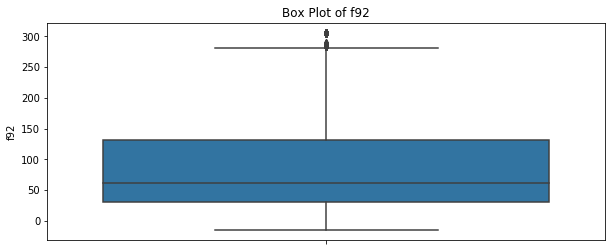

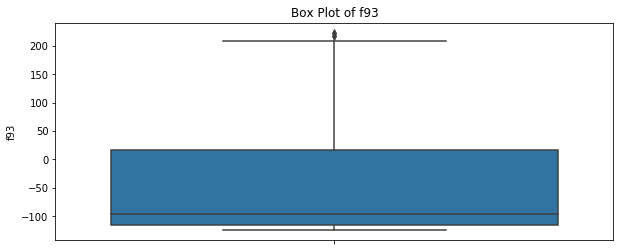

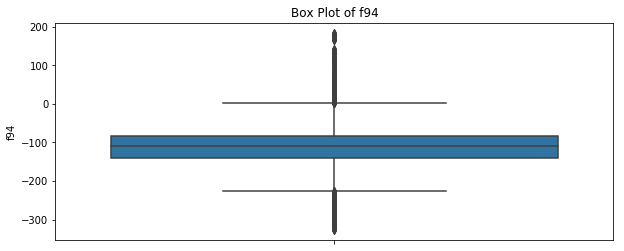

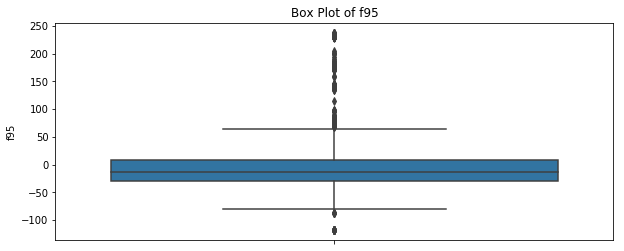

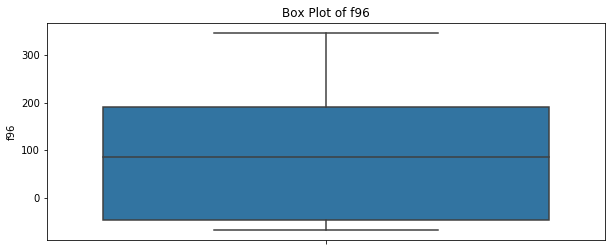

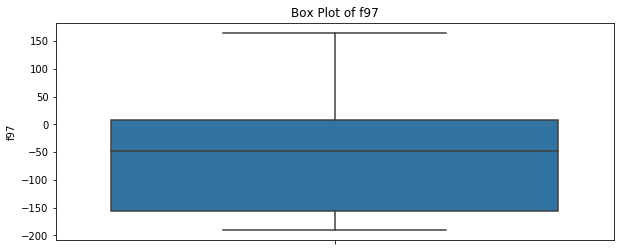

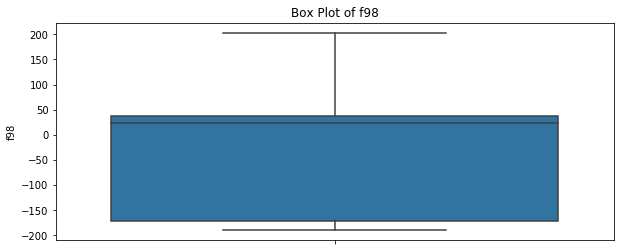

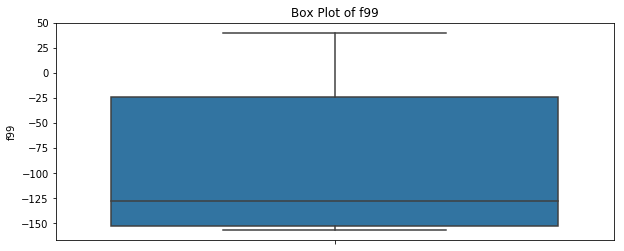

In [9]:
# Box Plot of numerical data
bp = PdfPages('BoxPlots with Attrition Split.pdf')
for variable in musk.columns.difference(['ID', 'molecule_name', 'conformation_name']):
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( y=variable, data = musk)
    plt.title(str('Box Plot of ') + str(variable))
    
bp.close()

### No outier found using Box Plot

## Removing 'ID', 'molecule_name', 'conformation_name' variable from feature list because they don't have significant meaning in data

In [10]:
feature_list=musk.columns.difference(['ID', 'molecule_name', 'conformation_name','class'])

## Standardrizing data 
- To put data on the same scale

In [11]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()

In [12]:
musk_scaled=sc.fit_transform(musk[feature_list])

C:\Users\mohsinu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mohsinu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
musk_scaled

array([[-0.24312408,  0.68664531,  0.26347519, ..., -0.03011833,
         0.05564997,  0.33617353],
       [-0.33702966, -0.76999993,  0.62142066, ...,  0.07049467,
         0.57336563, -0.98698037],
       [-0.24312408,  0.31207939,  0.62142066, ...,  0.40251755,
         0.58244836, -0.98698037],
       ...,
       [-0.28068632,  0.45080751, -1.55451102, ...,  0.51319184,
        -1.3703388 ,  1.05223329],
       [-0.1492185 ,  0.2010969 , -1.52625217, ...,  0.44276274,
        -1.41575245,  1.0677998 ],
       [-0.1492185 , -0.10410496, -1.52625217, ...,  1.42877008,
        -1.40666972,  1.0677998 ]])

###  Model Build and Diagnostics
 - Train and Test split in 80:20 ratio

In [14]:
X = musk_scaled
y= musk['class']
train_X, test_X,train_y,test_y = train_test_split(X,y, test_size=0.2, random_state=42)

### 3.2 Model Build and Diagnostics
    - Model build on the train_X sample using Multi-Layered Perceptron model

In [15]:
# defining param_grid for tunning the model
param_grid = {'hidden_layer_sizes': [(100,100),(100,100,100),(100,100,100,100),(200,200),(200,200,200),(200,200,200,200)]}

In [16]:
mlp = GridSearchCV(MLPClassifier(), param_grid, cv = 10)
mlp.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100), (200, 200), (200, 200, 200), (200, 200, 200, 200)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
mlp.best_params_

{'hidden_layer_sizes': (200, 200, 200, 200)}

In [18]:
mlp.best_score_

0.9939370973853733

#### After tunning of model we get (200,200,200,200) as our best parameter. So, build final model on this parameter.

In [19]:
final_mlp=MLPClassifier(hidden_layer_sizes=(200,200,200,200)).fit(train_X,train_y)


In [20]:
# calculating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
#confusion matrix for traning data
Pred_train = final_mlp.predict(train_X)
print(confusion_matrix(train_y,Pred_train))

[[4470    0]
 [   0  808]]


In [22]:
#confusion matrix for testing data
Pred_test = final_mlp.predict(test_X)
cm=confusion_matrix(test_y,Pred_test)
cm

array([[1110,    1],
       [   1,  208]], dtype=int64)

### Heatmap of confusion matrix of test data

Text(0.5, 15.0, 'Predicted label')

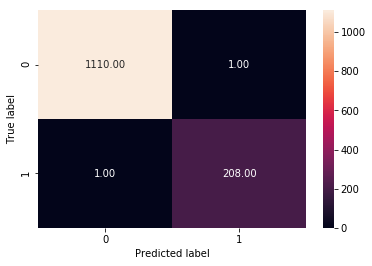

In [23]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0, 1] , yticklabels = [0,1] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [24]:
#Accuracy
score = metrics.accuracy_score( test_y, Pred_test )
score

0.9984848484848485

In [25]:
#Precision, recall, F1 score of test data
print(classification_report(test_y,Pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       209

   micro avg       1.00      1.00      1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



## Accuracy and loss graph

In [26]:
#acuuracy and loss for train data and test data for different epochs between(0,10)
acc_train=[]
loss_train=[]
acc_test=[]
loss_test=[]

for i in range(1,11):
    model=MLPClassifier(hidden_layer_sizes=(200,200,200,200),max_iter=i).fit(train_X,train_y)
    a=metrics.accuracy_score( train_y, model.predict(train_X) )
    l=(1-a)
    a1=metrics.accuracy_score( test_y, model.predict(test_X) )
    l1=(1-a1)
    acc_train.append(a)
    loss_train.append(l)
    acc_test.append(a1)
    loss_test.append(l1)

C:\Users\mohsinu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mohsinu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mohsinu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mohsinu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [27]:
loss_test

[0.05378787878787883,
 0.03712121212121211,
 0.030303030303030276,
 0.018181818181818188,
 0.012878787878787934,
 0.006818181818181834,
 0.008333333333333304,
 0.007575757575757569,
 0.005303030303030254,
 0.0060606060606061]

#### Loss Graph

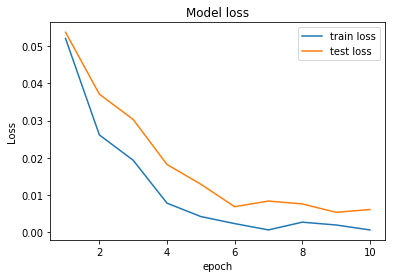

In [28]:
sns.lineplot(x=list(range(1,11)),y=loss_train,label='train loss')
sns.lineplot(x=list(range(1,11)),y=loss_test,label='test loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()

#### Accuracy Graph

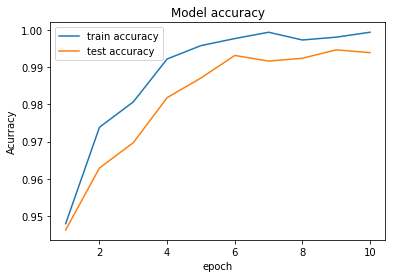

In [29]:
sns.lineplot(x=list(range(1,11)),y=acc_train,label='train accuracy')
sns.lineplot(x=list(range(1,11)),y=acc_test,label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('Acurracy')
plt.title('Model accuracy')
plt.legend()

### So, My final model name is 'final_mlp'